## Importing Libraries 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.metrics import plot_confusion_matrix 
from sklearn.metrics import classification_report
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import sklearn.metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import make_pipeline
from sklearn import svm
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer

## import Dataset

In [3]:
df = pd.read_csv("Bankloans.csv")
df.sample(3)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
231,LP002188,Male,No,0,Graduate,No,5124,0.0,124.0,NaN,0.0,Rural,N
160,LP001854,Male,Yes,3+,Graduate,No,5250,0.0,94.0,360.0,1.0,Urban,N
255,LP002296,Male,No,0,Not Graduate,No,2755,0.0,65.0,300.0,1.0,Rural,N


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381 entries, 0 to 380
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            381 non-null    object 
 1   Gender             376 non-null    object 
 2   Married            381 non-null    object 
 3   Dependents         373 non-null    object 
 4   Education          381 non-null    object 
 5   Self_Employed      360 non-null    object 
 6   ApplicantIncome    381 non-null    int64  
 7   CoapplicantIncome  381 non-null    float64
 8   LoanAmount         381 non-null    float64
 9   Loan_Amount_Term   370 non-null    float64
 10  Credit_History     351 non-null    float64
 11  Property_Area      381 non-null    object 
 12  Loan_Status        381 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 38.8+ KB


In [5]:
# Loan_ID column is not an important column so we will drop it 
df = df.drop(['Loan_ID'], axis=1)

In [6]:
# missing value 
df.isnull().sum()

Gender                5
Married               0
Dependents            8
Education             0
Self_Employed        21
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     11
Credit_History       30
Property_Area         0
Loan_Status           0
dtype: int64

# Handling the missing values 

In [7]:
imputer_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
df['Loan_Amount_Term'] = imputer_mean.fit_transform(df['Loan_Amount_Term'].values.reshape(-1,1))[:,0]
df['Loan_Amount_Term'] = round(df['Loan_Amount_Term'])

In [8]:
imputer_most_frequent1 = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
df['Gender'] = imputer_most_frequent1.fit_transform(df['Gender'].values.reshape(-1,1))[:,0]

In [9]:
df['Dependents'].mode()

0    0
Name: Dependents, dtype: object

In [10]:
imputer_constant_1 = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
df['Dependents'] = imputer_constant_1.fit_transform(df['Dependents'].values.reshape(-1,1))[:,0]

In [11]:
df['Self_Employed'].mode()

0    No
Name: Self_Employed, dtype: object

# Handling the missing values 

In [12]:
imputer_constant_2 = SimpleImputer(missing_values=np.nan, fill_value="0", strategy='constant')
df['Self_Employed'] = imputer_constant_2.fit_transform(df['Self_Employed'].values.reshape(-1,1))[:,0]

In [13]:
df['Credit_History'].mode()

0    1.0
Name: Credit_History, dtype: float64

In [14]:
imputer_most_frequent3 = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
df['Credit_History'] = imputer_most_frequent3.fit_transform(df['Credit_History'].values.reshape(-1,1))[:,0]

D:\Anaconda\lib\site-packages\sklearn\impute\_base.py:49: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode = stats.mode(array)


In [15]:
df.isna().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

# EDA

### Subplot

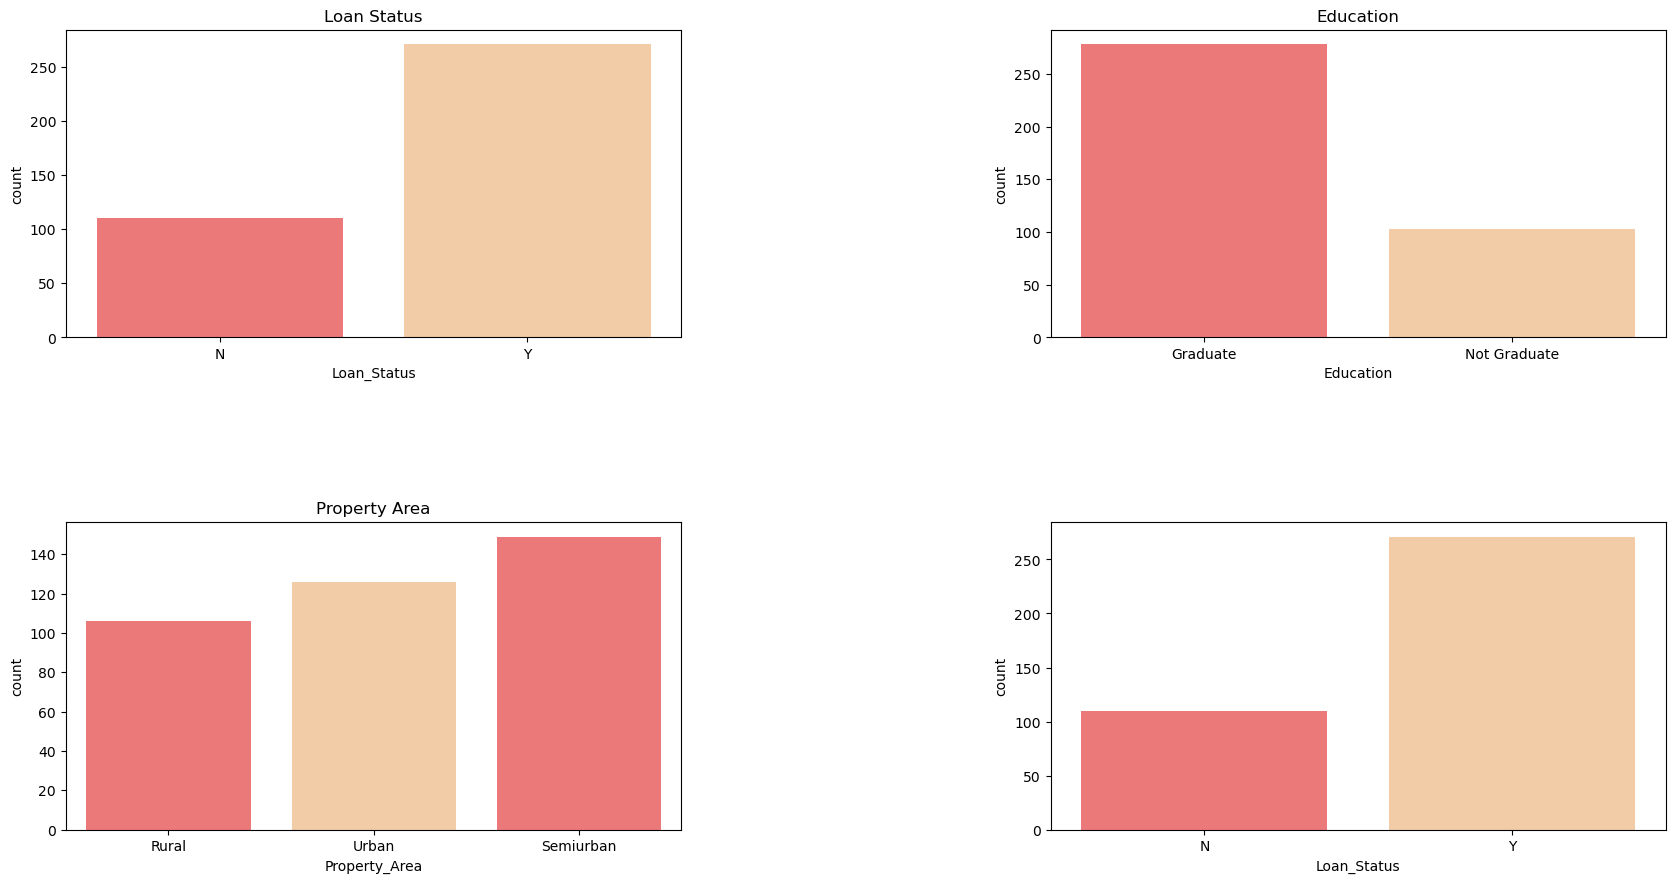

In [16]:
colors = ['#ff6666', '#ffcc99']
plt.figure(figsize=(20, 10))
plt.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9, hspace=0.6, wspace=0.6)
plt.subplot(2, 2, 1)
sns.countplot(x="Loan_Status", data=df, palette=colors).set_title('Loan Status')
plt.subplot(2, 2, 2)
sns.countplot(x="Education", data=df, palette=colors).set_title('Education')
plt.subplot(2, 2, 3)
sns.countplot(x="Property_Area", data=df, palette=colors).set_title('Property Area')
plt.subplot(2, 2, 4)
sns.countplot(x="Loan_Status", data=df, palette=colors).set_title('')
plt.show()

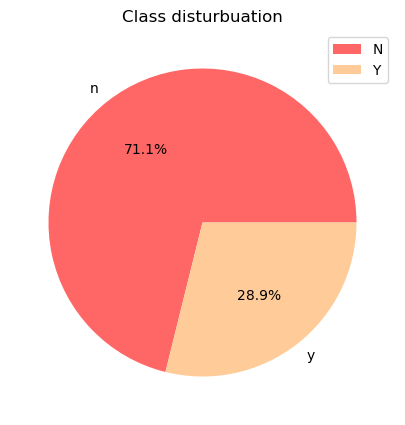

In [17]:
# Class Disturbuation
labels = 'n', 'y'
colors = ['#ff6666', '#ffcc99']
plt.figure(figsize=(13,5))
class_disturbuation= plt.pie(df['Loan_Status'].value_counts(),labels = labels, autopct='%1.1f%%',colors=colors)
plt.legend(df['Loan_Status'], loc="upper right")
plt.show()

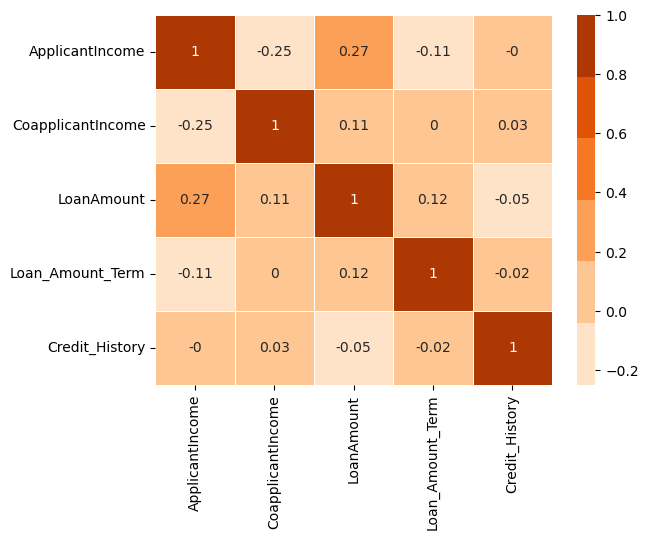

In [18]:
sns.heatmap(data=df.corr().round(2), annot=True, linewidths=0.7, cmap=sns.color_palette("Oranges"))
plt.show()

In [19]:
df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

Text(0.5, 0, 'LoanAmount')

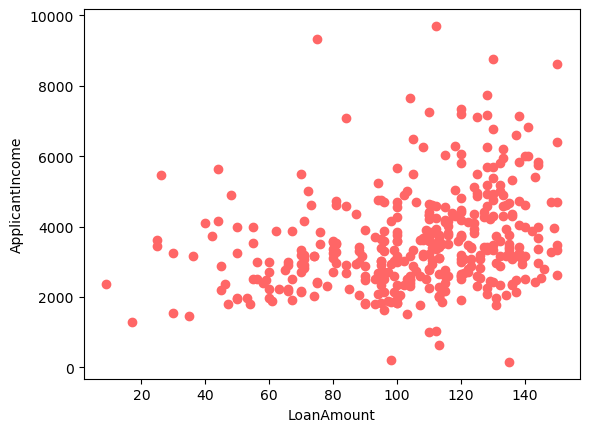

In [76]:
# Loan Amount
plt.scatter(x=df['LoanAmount'],y= df['ApplicantIncome'], c=colors[0])
plt.ylabel('ApplicantIncome')
plt.xlabel('LoanAmount')

<AxesSubplot:xlabel='Loan_Status', ylabel='ApplicantIncome'>

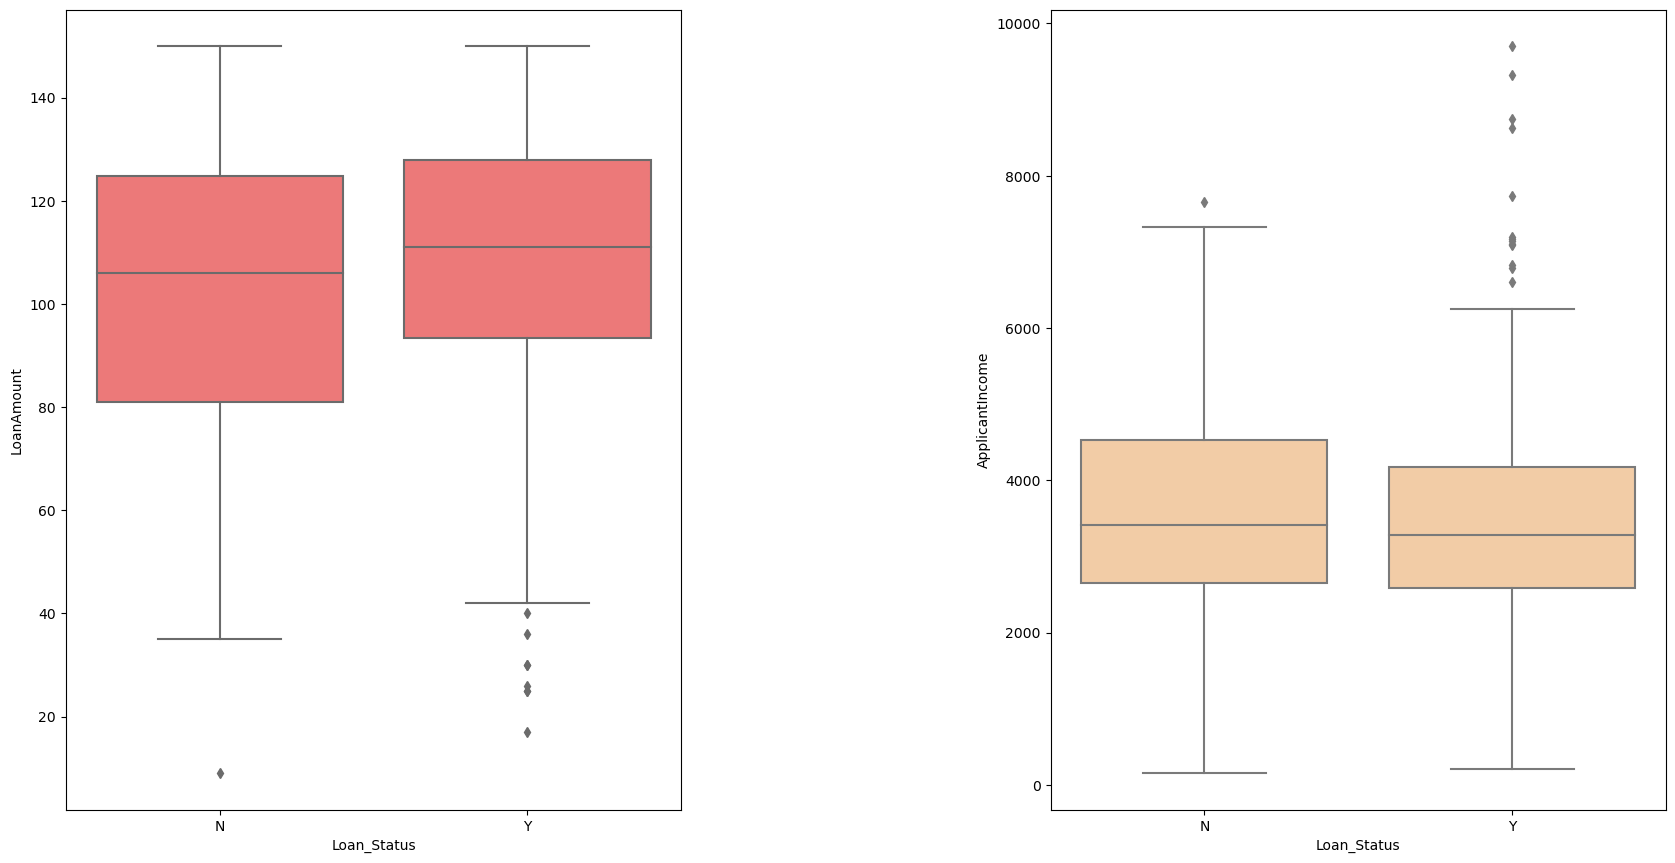

In [63]:
#Loan Status
plt.figure(figsize=(20, 10))
plt.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9, hspace=0.6, wspace=0.6)
plt.subplot(1, 2, 1)
sns.boxplot(data=df, y="LoanAmount", x="Loan_Status", color=colors[0])
plt.subplot(1, 2, 2)
sns.boxplot(data=df, x="Loan_Status", y='ApplicantIncome', color=colors[1])

In [80]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,1,1,0,1,4583,1508.0,128.0,360.0,1.0,0,0
1,1,1,0,0,2,3000,0.0,66.0,360.0,1.0,2,1
2,1,1,0,1,1,2583,2358.0,120.0,360.0,1.0,2,1
3,1,0,0,0,1,6000,0.0,141.0,360.0,1.0,2,1
4,1,1,0,1,1,2333,1516.0,95.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
376,1,1,3,0,1,5703,0.0,128.0,360.0,1.0,2,1
377,1,1,0,0,1,3232,1950.0,108.0,360.0,1.0,0,1
378,0,0,0,0,1,2900,0.0,71.0,360.0,1.0,0,1
379,1,1,3,0,1,4106,0.0,40.0,180.0,1.0,0,1


Text(0.5, 1.0, 'Class disturbuation')

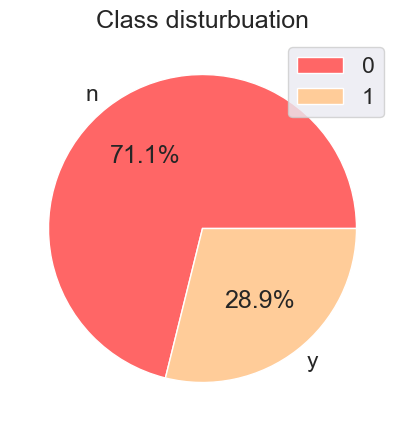

In [81]:
labels = 'n', 'y'
colors = ['#ff6666', '#ffcc99']
plt.figure(figsize=(13,5))
class_disturbuation= plt.pie(df['Loan_Status'].value_counts(),labels = labels, autopct='%1.1f%%',colors=colors)
plt.legend(df['Loan_Status'], loc="upper right")
plt.title('Class disturbuation')

# We have an imbalance problem 

In [82]:
df.nunique()

Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          3
ApplicantIncome      322
CoapplicantIncome    182
LoanAmount           101
Loan_Amount_Term      11
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

In [83]:
df.Dependents=df.Dependents.astype(str)

In [84]:
#labelEncoder
labelEncoder = LabelEncoder()
df['Gender'] = labelEncoder.fit_transform(df['Gender'])
df['Married'] = labelEncoder.fit_transform(df['Married'])
df['Education'] = labelEncoder.fit_transform(df['Education'])
df['Property_Area'] = labelEncoder.fit_transform(df['Property_Area'])
df['Self_Employed'] = labelEncoder.fit_transform(df['Self_Employed'])
df['Dependents'] = labelEncoder.fit_transform(df['Dependents'])
df['Loan_Status'] = labelEncoder.fit_transform(df['Loan_Status'])

In [65]:
df.sample(5)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
110,Male,No,0,Graduate,No,1916,5063.0,67.0,360.0,1.0,Rural,N
351,Female,No,0,Graduate,No,2667,1625.0,84.0,360.0,1.0,Urban,Y
155,Male,Yes,1,Graduate,No,2882,1843.0,123.0,480.0,1.0,Semiurban,Y
9,Male,No,0,Graduate,No,4950,0.0,125.0,360.0,1.0,Urban,Y
158,Male,No,0,Not Graduate,Yes,2583,2167.0,104.0,360.0,1.0,Rural,Y


In [86]:
#Choosing features and target

X = df.loc[:, df.columns != 'Loan_Status']
Y = df['Loan_Status']

print("X Columns: ",list(X.columns))

X Columns:  ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Property_Area']


In [87]:
#Split the training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.20, random_state = 0)

# Classification Models 

In [88]:
models = {
    "Lr1": LogisticRegression(max_iter=2085,penalty='none',random_state=101),
    "Lr2": LogisticRegression(max_iter=2085,penalty='l2',C=0.5,random_state=101),
    "5nn": KNeighborsClassifier(n_neighbors=5),
    "10nn": KNeighborsClassifier(n_neighbors=10),
    "Dt1": DecisionTreeClassifier(max_depth=3, max_features='log2',random_state=101),
    "Dt2": DecisionTreeClassifier(max_depth=5, max_features='sqrt',random_state=101),
    "rf1": RandomForestClassifier(n_estimators=200, max_features='log2',random_state=101),
    "rf2": RandomForestClassifier(n_estimators=2000, max_features='sqrt',random_state=101),
    "svm": svm.SVC(),
}

In [89]:
model_eval_results = []
for model in models:
    models[model].fit(X_train,y_train)
    y_pred = models[model].predict(X_test)
    model_eval_results.append(sklearn.metrics.accuracy_score(y_true=y_test, y_pred=y_pred))

D:\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
D:\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avo

In [90]:
#Present models in datafram 
Models = ['Lr1','Lr2','5nn','10nn','Dt1','Dt2','rf1','rf2','svm']
result_df = pd.DataFrame(data=model_eval_results,
                         columns=['Accuracy'])
result_df['Models'] = Models

result_df

,Accuracy,Models
0,0.805195,Lr1
1,0.818182,Lr2
2,0.701299,5nn
3,0.701299,10nn
4,0.818182,Dt1
5,0.831169,Dt2
6,0.792208,rf1
7,0.805195,rf2
8,0.714286,svm


Text(0.5, 1.0, 'Accuracy')

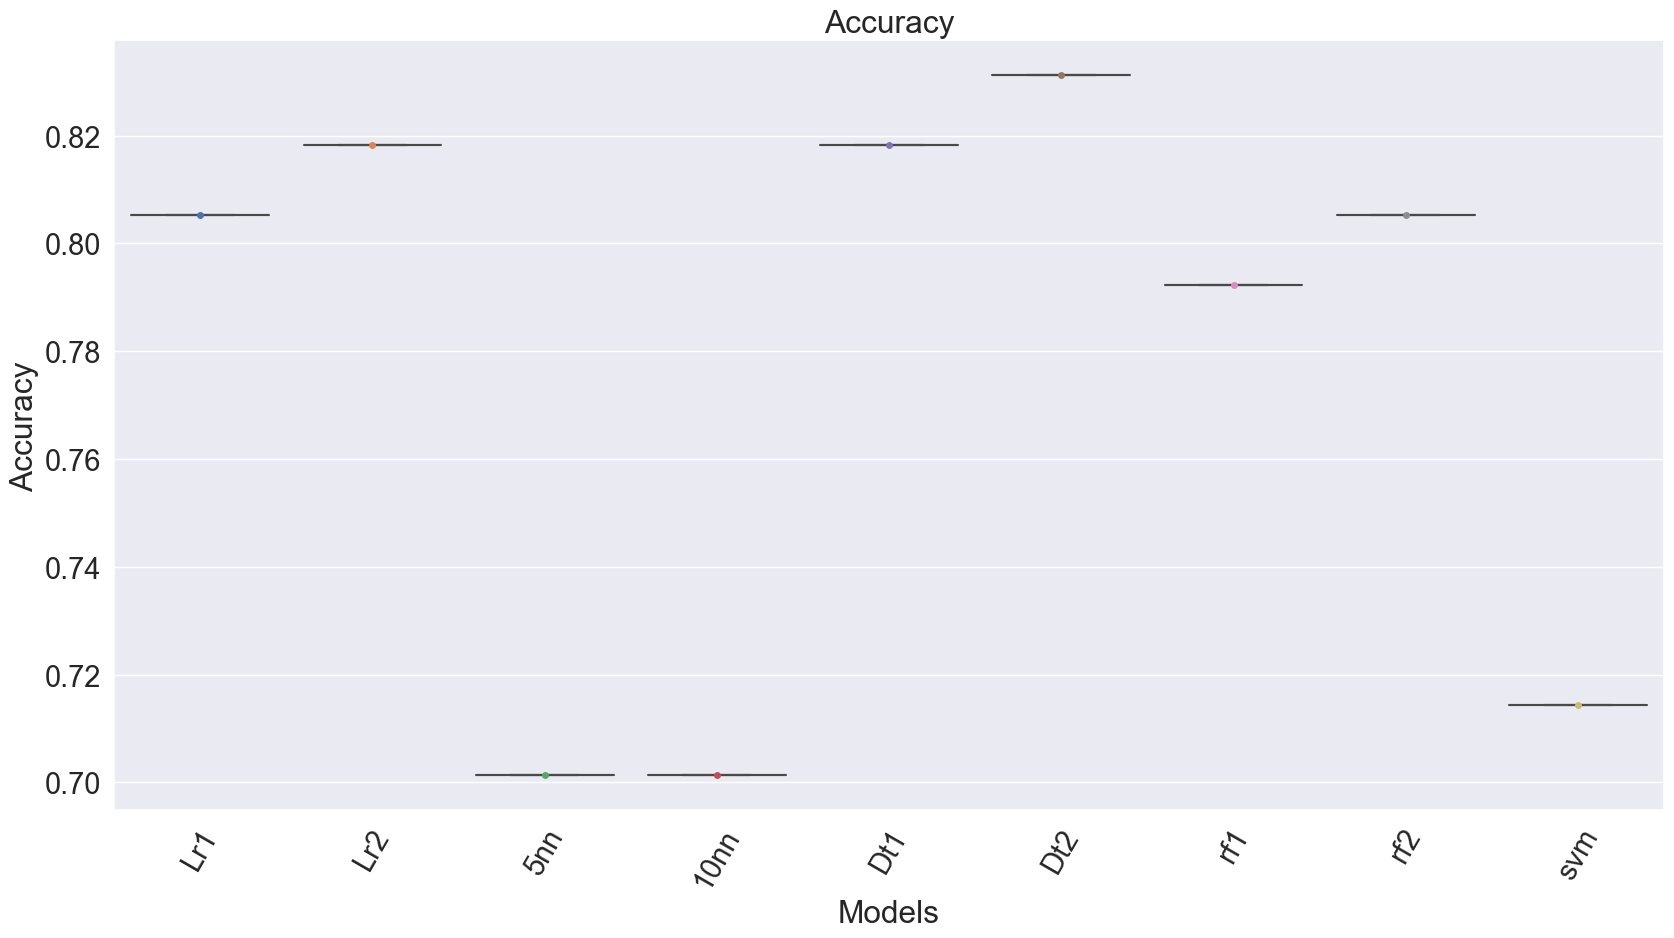

In [91]:
#showing models in graph
sns.set_context("paper")
sns.set(font_scale=1.9)
plt.figure(figsize=(20, 10))
ax = sns.boxplot(x="Models", y="Accuracy", data=result_df)
ax = sns.swarmplot(x="Models", y="Accuracy", data=result_df)
plt.xticks(rotation=60)
plt.title('Accuracy')

# As you can see  Decision Tree Classifier models had the best accuracy.

In [92]:
best_model = make_pipeline(
    # Step-3 fit the principles to the ML model
    DecisionTreeClassifier(max_depth=5, max_features='sqrt',random_state=101))
best_model.fit(X_train, y_train)
best_model.score(X_test, y_test)

0.8311688311688312

# Regression Models

In [93]:
RX_train, RX_test, Ry_train, Ry_test = train_test_split(df.drop('LoanAmount',axis=1), df['LoanAmount'], test_size = 0.20, random_state = 0)

RegModel = {
"MultiLinear Regression":LinearRegression() ,
"KNeighbors Regression":KNeighborsRegressor(n_neighbors=10),
"Decision Tree Regression":DecisionTreeRegressor(max_depth=4,min_samples_split=3,max_features='auto',random_state=42),
"Random Forest Regression":RandomForestRegressor(n_estimators=30,max_depth=4,min_samples_split=3,random_state=42),
"SVM for Regression": svm.SVR(gamma='scale',C=15)
}

In [94]:
# Matrices for each models
mae = []
mse = []
r2 = []
mod_name=[]
for model in RegModel:
    mod_name.append(model)
    RegModel[model].fit(RX_train,Ry_train)
    y_pred1 = RegModel[model].predict(RX_test)
    mae.append(mean_absolute_error(Ry_test,y_pred1))
    mse.append(mean_squared_error(Ry_test,y_pred1))
    r2.append(r2_score(Ry_test,y_pred1))
Model_scores = pd.DataFrame( data ={'mae': mae,'mse':mse,'r2':r2}, index=mod_name)
Model_scores

,mae,mse,r2
MultiLinear Regression,20.696637,675.689092,0.168175
KNeighbors Regression,16.662338,498.592987,0.386194
Decision Tree Regression,16.745685,455.869905,0.438789
Random Forest Regression,16.533329,449.437368,0.446708
SVM for Regression,16.514641,509.929560,0.372237


Text(0.5, 1.0, 'Mean Absolute Error for Estimetres')

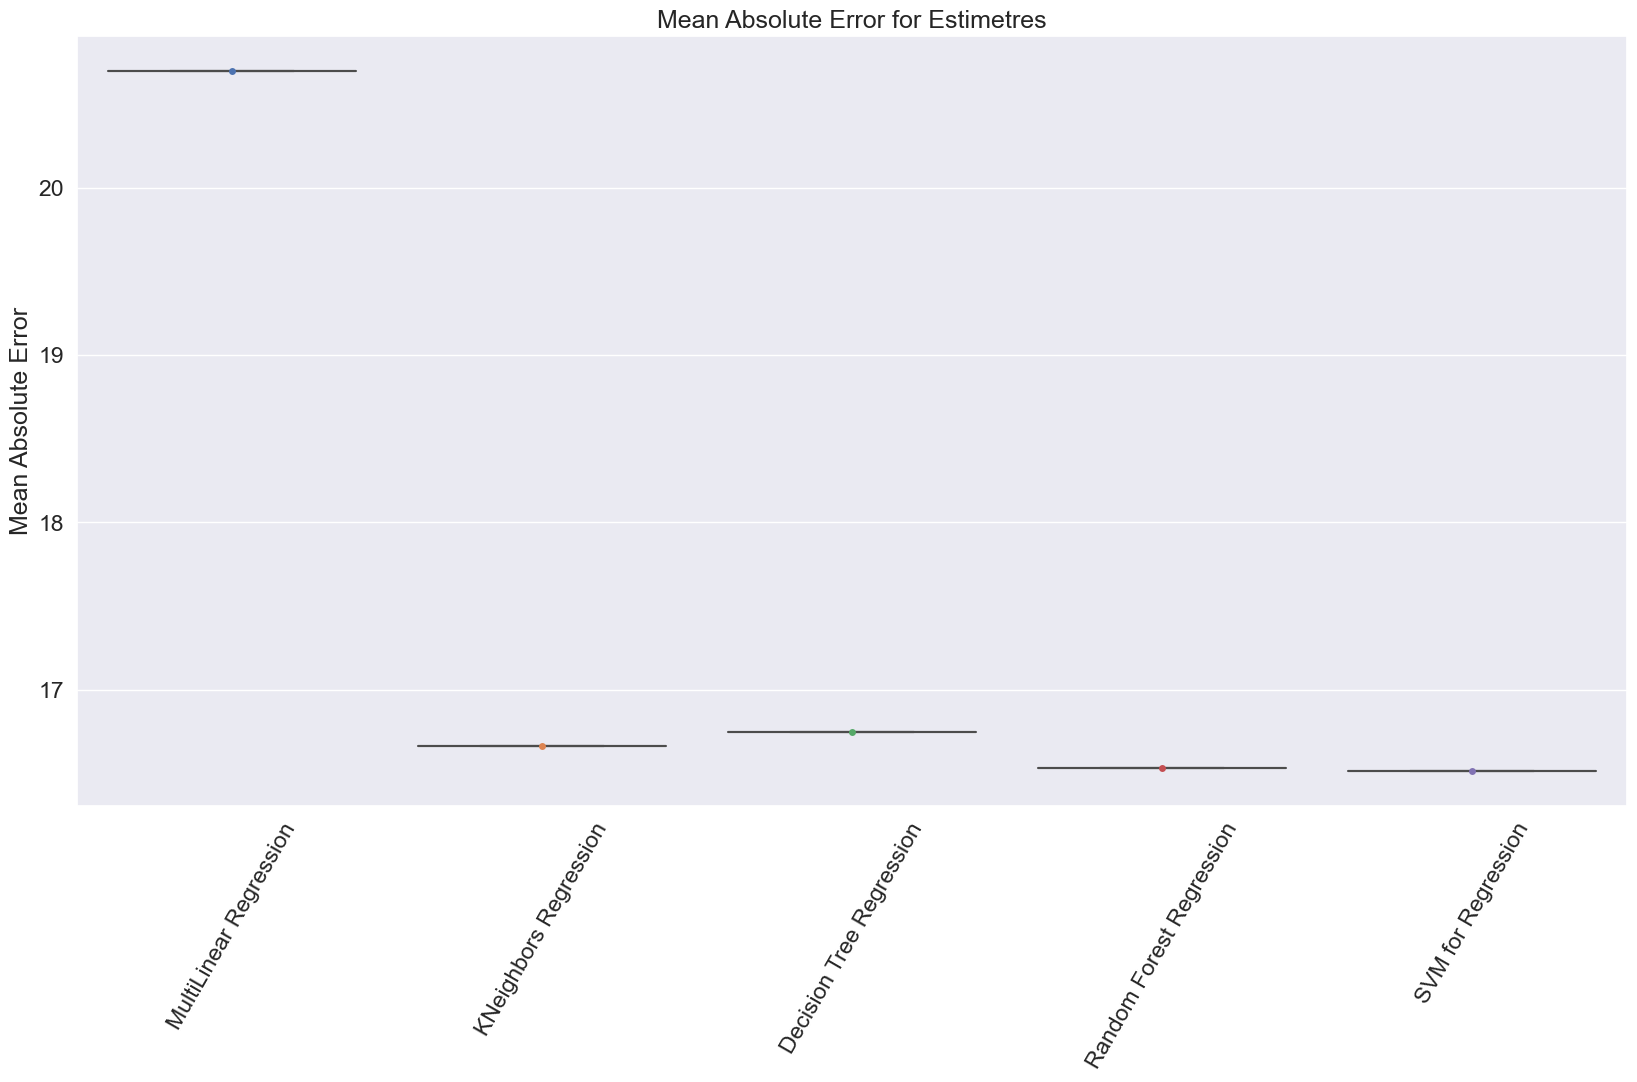

In [95]:
#showing models in graph
sns.set_context("paper")
sns.set(font_scale=1.5)
plt.figure(figsize=(20, 10))
ax = sns.boxplot(x=Model_scores.index, y="mae", data=Model_scores)
ax = sns.swarmplot(x=Model_scores.index, y="mae", data=Model_scores)
plt.ylabel('Mean Absolute Error')
plt.xticks(rotation=60)
plt.title('Mean Absolute Error for Estimetres')

# As you can see SVM for Regression models had the lowest Mean Absolute Error.

In [96]:
best_Reg_model = make_pipeline(
svm.SVR(gamma='scale',C=15))
best_Reg_model.fit(RX_train, Ry_train)
be_yre = best_Reg_model.predict(RX_test)
mean_absolute_error(Ry_test,be_yre)

16.514640709853257

# PCA

In [97]:
model_eval_results = []
for model in models:
    pipe = make_pipeline(
            # Step-1 Scale parameters
         StandardScaler(),
            # Step-2 create PCA and set number of components
         PCA(n_components=10),
            # Step-3 fit the principles to the ML model
         models[model]
          )
    pipe.fit(X_train, y_train)
    pred_i = pipe.predict(X_test)
   
    model_eval_results.append(sklearn.metrics.accuracy_score(y_true=y_test, y_pred=pred_i))

D:\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
D:\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avo

In [98]:
#Present models in datafram 
Models = ['Lr1','Lr2','5nn','10nn','Dt1','Dt2','rf1','rf2','svm']
result_df = pd.DataFrame(data=model_eval_results,
                         columns=['Accuracy'])
result_df['Models'] = Models

result_df

,Accuracy,Models
0,0.818182,Lr1
1,0.818182,Lr2
2,0.792208,5nn
3,0.831169,10nn
4,0.792208,Dt1
5,0.792208,Dt2
6,0.792208,rf1
7,0.779221,rf2
8,0.818182,svm


Text(0.5, 1.0, 'Accuracy')

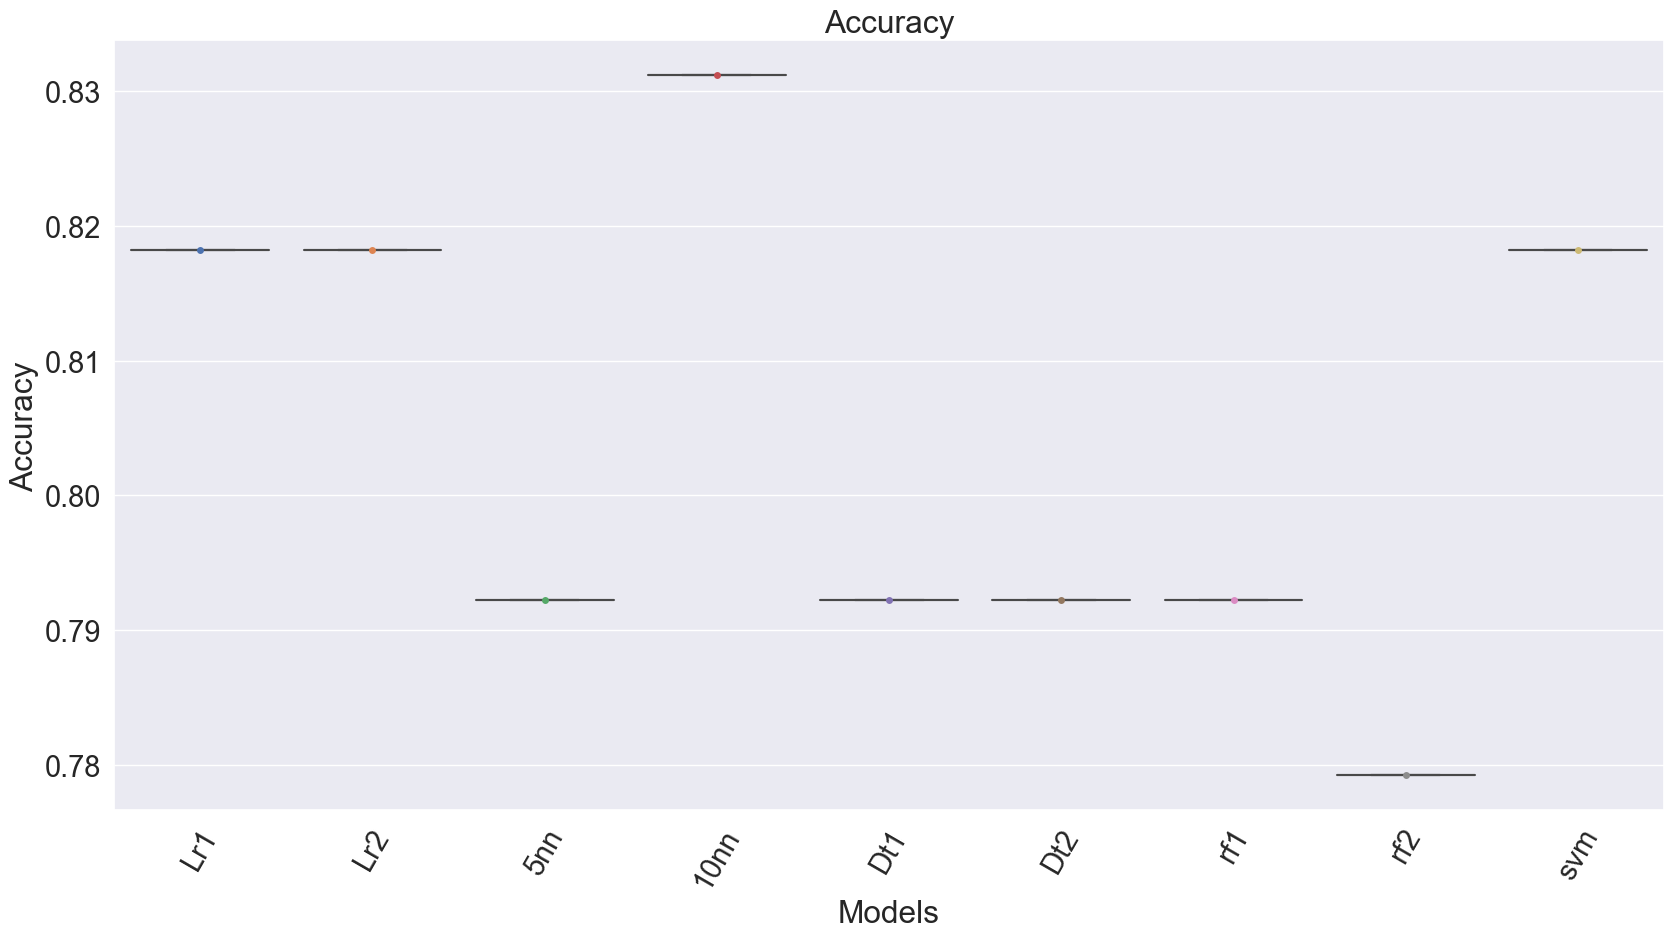

In [99]:
#showing models in graph
sns.set_context("paper")
sns.set(font_scale=1.9)
plt.figure(figsize=(20, 10))
ax = sns.boxplot(x="Models", y="Accuracy", data=result_df)
ax = sns.swarmplot(x="Models", y="Accuracy", data=result_df)
plt.xticks(rotation=60)
plt.title('Accuracy')

In [101]:
mae = []
mse = []
r2 = []
mod_name=[]
for model in RegModel:
    mod_name.append(model)
    pipe = make_pipeline(
            # Step-1 create PCA and set number of components
         PCA(n_components=6),
            # Step-2 fit the principles to the ML model
         RegModel[model]
    )
    pipe.fit(RX_train, Ry_train)
    pred_i = pipe.predict(RX_test)
    mae.append(mean_absolute_error(Ry_test,pred_i))
    mse.append(mean_squared_error(Ry_test,pred_i))
    r2.append(r2_score(Ry_test,pred_i))

In [102]:
Model_scores2 = pd.DataFrame( data ={'mae': mae,'mse':mse,'r2':r2}, index=mod_name)
Model_scores2

,mae,mse,r2
MultiLinear Regression,19.915645,629.403895,0.225155
KNeighbors Regression,16.662338,498.592987,0.386194
Decision Tree Regression,18.622274,596.178498,0.266058
Random Forest Regression,16.593299,480.284887,0.408732
SVM for Regression,16.150700,504.087426,0.379430


Text(0.5, 1.0, 'Mean Absolute Error for Estimetres')

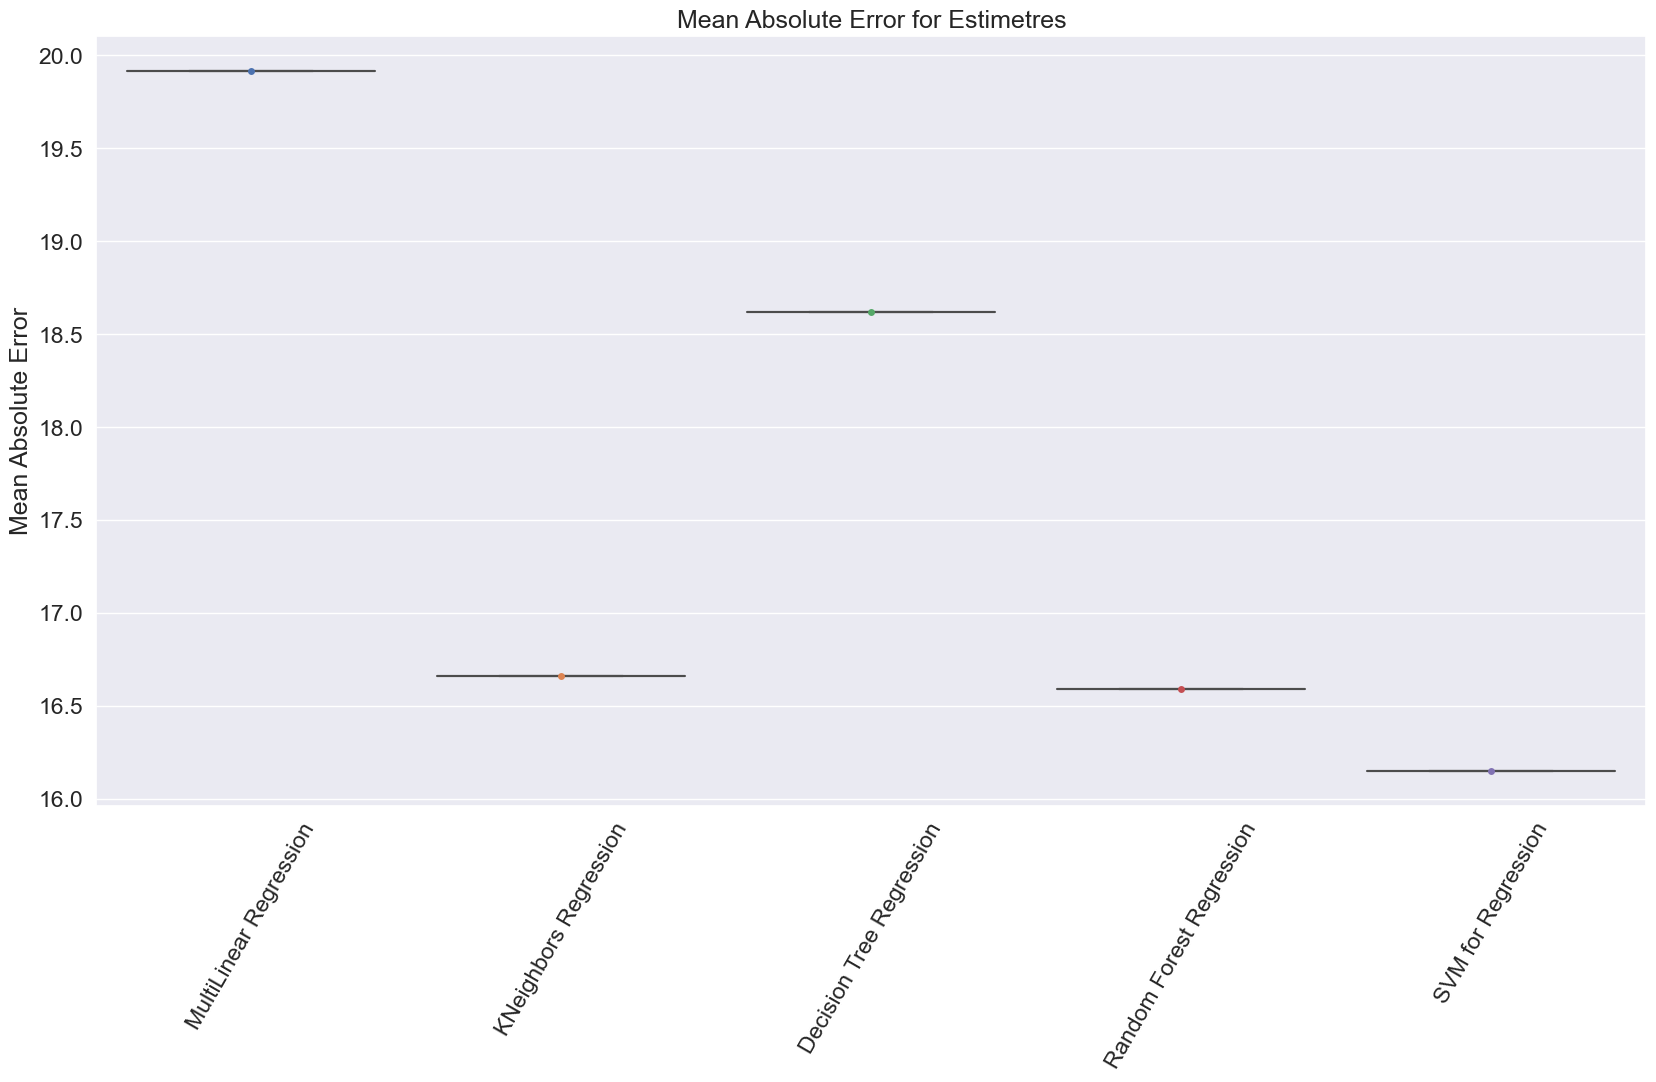

In [103]:
#showing models in graph
sns.set_context("paper")
sns.set(font_scale=1.5)
plt.figure(figsize=(20, 10))
ax = sns.boxplot(x=Model_scores.index, y="mae", data=Model_scores2)
ax = sns.swarmplot(x=Model_scores.index, y="mae", data=Model_scores2)
plt.ylabel('Mean Absolute Error')
plt.xticks(rotation=60)
plt.title('Mean Absolute Error for Estimetres')